In [42]:
from _shgo import *

In [43]:
def f(x):  # Alpine2
    prod = 1
    for i in range(numpy.shape(x)[0]):
        prod = prod * numpy.sqrt(x[i]) * numpy.sin(x[i])

    return prod

bounds = [(0, 5), (0, 5)]
n = 10

In [44]:
SHc = SHGO(f, bounds, n = n)

In [45]:
import numpy
bounds = [(0, 1), (0, 1)]
SHc2 = SHGO(f, bounds, n = 5)
def f2(x):
    return x[0]**2 + x[1]**2

Set = SHc2.sampling()

print(Set)
print(f2(numpy.array(Set).T))

F1 = numpy.array([0, 0.625, 0.28125, 0.5, 0.625])
F2 = numpy.array([0, 0.625, 0.28125, 0.5, 0.625])
print(F1[1:] - F1[:4])
print(F1[:4] - F1[1:])
#print(F1[1:] - F1[:4])
#print(F1[:] - F1[:4])

#self.Ftp = numpy.diff(self.Ft, axis=0)  # FD
#self.Ftm = numpy.diff(self.Ft[::-1], axis=0)[::-1]  # BD
print("F1p = {} ".format(numpy.diff(F1, axis=0)))
print("F1n = {} ".format( numpy.diff(F1[::-1], axis=0)[::-1] ))

print("F2p = {} ".format(numpy.diff(F2, axis=0)))
print("F2n = {} ".format( numpy.diff(F2[::-1], axis=0)[::-1] ))


[[ 0.     0.   ]
 [ 0.5    0.5  ]
 [ 0.75   0.25 ]
 [ 0.25   0.75 ]
 [ 0.375  0.375]]
[ 0.       0.5      0.625    0.625    0.28125]
[ 0.625   -0.34375  0.21875  0.125  ]
[-0.625    0.34375 -0.21875 -0.125  ]
F1p = [ 0.625   -0.34375  0.21875  0.125  ] 
F1n = [-0.625    0.34375 -0.21875 -0.125  ] 
F2p = [ 0.625   -0.34375  0.21875  0.125  ] 
F2n = [-0.625    0.34375 -0.21875 -0.125  ] 


In [46]:
SHc.construct_complex_sobol()

In [47]:
# Minimise the pool of minisers with local minimisation methods
SHc.minimise_pool()

In [48]:
# Sort results and build the global return object
SHc.sort_result()

In [49]:
#res = shgo(f, bounds)

<IPython.core.display.Javascript object>


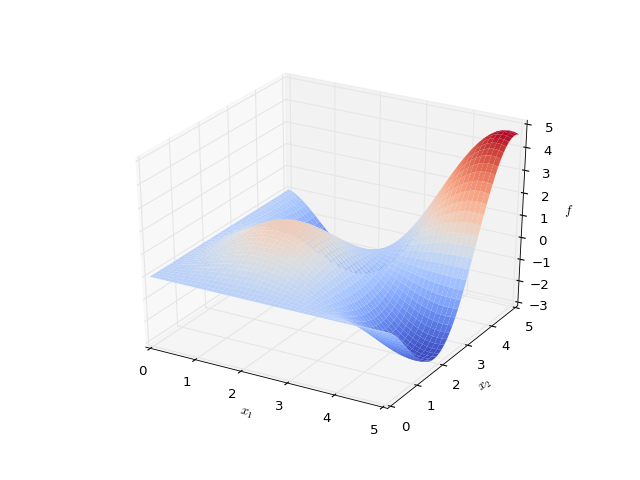

<IPython.core.display.Javascript object>


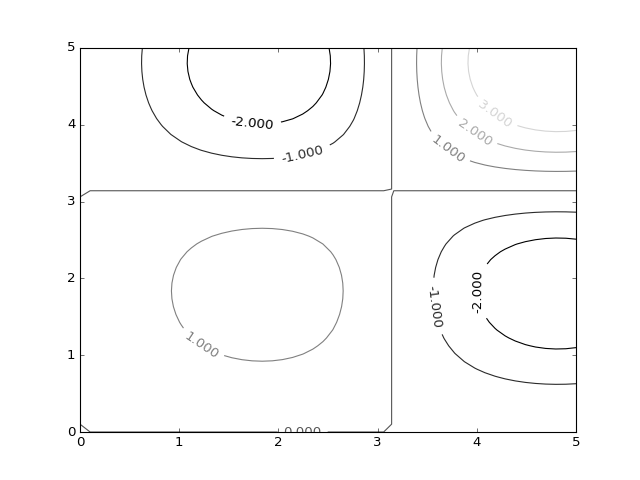

In [137]:
%matplotlib nbagg
import matplotlib.pyplot as plt
def build_contour(SHc, surface=True, contour=True):
    from mpl_toolkits.mplot3d import axes3d
    import matplotlib.pyplot as plt
    from matplotlib import cm

    X = SHc.C[:, 0]
    X = numpy.linspace(SHc.bounds[0][0], SHc.bounds[0][1])
    Y = SHc.C[:, 1]
    Y = numpy.linspace(SHc.bounds[1][0], SHc.bounds[1][1])
    xg, yg = numpy.meshgrid(X, Y)
    Z = numpy.zeros((xg.shape[0],
                     yg.shape[0]))

    for i in range(xg.shape[0]):
        for j in range(yg.shape[0]):
            Z[i, j] = SHc.func([xg[i, j], yg[i, j]])

    if surface:
        fig = plt.figure()
        ax = fig.gca(projection='3d')
        ax.plot_surface(xg, yg, Z, rstride=1, cstride=1,
                        cmap=cm.coolwarm, linewidth=0,
                        antialiased=True, alpha=1.0, shade=True)
        if False:
            cset = ax.contour(X, Y, Z, zdir='z', offset=-100, cmap=cm.coolwarm)
            cset = ax.contour(X, Y, Z, zdir='x', offset=-40, cmap=cm.coolwarm)
            cset = ax.contour(X, Y, Z, zdir='y', offset=40, cmap=cm.coolwarm)

        ax.set_xlabel('$x_1$')
        ax.set_ylabel('$x_2$')
        ax.set_zlabel('$f$')
        
    if contour:  
        plt.figure()
        cs = plt.contour(xg, yg, Z, cmap='binary_r', color='k')
        plt.clabel(cs)

build_contour(SHc)
plt.show()


In [141]:
def direct_2d(ax, func, V1, V2, vertex_plot_size=0.00):
    """Draw a directed graph arrow between two vertices"""
    
    # NOTE: Can retrieve from stored class
    f_1 = func(V1)
    f_2 = func(V2)

    def vertex_diff(V_low, V_high, vertex_plot_size):
        # Note assumes bounds in R+ (0, inf)
        dV = [0, 0]
        for i in [0, 1]:
            if V_low[i] < V_high[i]:
                dV[i] = -(V_high[i] - V_low[i]) #+ vertex_plot_size
            else:
                dV[i] = V_low[i] - V_high[i]  #- vertex_plot_size

            if dV[i] > 0:
                dV[i] -= vertex_plot_size
            else:
                dV[i] += vertex_plot_size

        return dV

    if f_1 > f_2:  # direct V2 --> V1
        dV = vertex_diff(V1, V2, vertex_plot_size)
        #print(dV)        
        #ax.arrow(V2[0], V2[1], dV[0], dV[1], head_width=0.2, head_length=0.05, fc='k', ec='k', color='b')
        ax.arrow(V2[0], V2[1], 0.6*dV[0], 0.6*dV[1], head_width=0.05, head_length=0.2, fc='k', ec='k', color='b')

    elif f_1 < f_2:  # direct V1 --> V2
        pass
        #ax.arrow(V2[0], V2[1], dV[0], dV[1], head_width=0.2, head_length=0.05, fc='k', ec='k', color='b')
    
    return f_1, f_2 #TEMPORARY USE IN LOOP

<IPython.core.display.Javascript object>


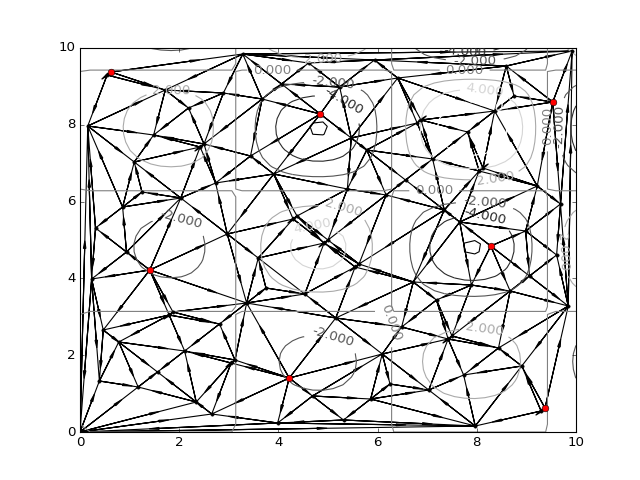

[[ 8.28125  4.84375]
 [ 4.84375  8.28125]
 [ 4.21875  1.40625]
 [ 1.40625  4.21875]
 [ 9.53125  8.59375]
 [ 9.375    0.625  ]
 [ 0.625    9.375  ]]
Incidence Array:
[[ 1.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


In [142]:
%matplotlib nbagg
from ipywidgets import interact

def build_complex(n, lb1=0, lb2=0, ub1=5, ub2=5):
    import numpy
    bounds=[(lb1, ub1), (lb2, ub2)]
    SHc = SHGO(f, bounds, n = n)
    SHc.construct_complex_sobol()
    SHc.minimise_pool()
    SHc.sort_result()
    
    import matplotlib.pyplot as plt
    from scipy.spatial import Delaunay
    #plt.figure()
    
    points = SHc.C
    tri = Delaunay(points)
    
    # Label edges
    edges = numpy.array(tri.simplices)#numpy.zeros(len(tri.simplices))
    constructed_edges = []
    incidence_array = numpy.zeros([numpy.shape(points)[0], numpy.shape(edges)[0]])
    
    # contour
    build_contour(SHc, surface=False, contour=True)

    # graph
    plt.triplot(points[:, 0], points[:, 1], tri.simplices.copy(), color='k')
    plt.plot(points[:, 0], points[:, 1], 'k.')
    #plt.plot(points[:, 0], points[:, 1], 'ro')
    plt.plot(SHc.C[SHc.minimizer_pool, :][:, 0], SHc.C[SHc.minimizer_pool, :][:, 1], 'ro')
    print(SHc.C[SHc.minimizer_pool, :])

    # directed
    ax = plt.axes()
    for i in range(points.shape[0]):
        for i2 in SHc.find_neighbors(i, SHc.Tri):
            # Draw arrow
            f_1, f_2 = direct_2d(ax, f, SHc.Tri.points[i, :], SHc.Tri.points[i2, :])
            
            # Find incidence on an edge
            for edge, e in zip(edges, range(numpy.shape(edges)[0])):
                #print(edge)
                if e not in constructed_edges:
                    if i in edge:
                        if f_1 < f_2:
                            incidence_array[i, e] += 1
                        elif  f_1 > f_2: 
                            incidence_array[i, e] -= 1
                    if i2 in edge:
                        if f_2 < f_1:
                            incidence_array[i2, e] += 1
                        elif f_2 > f_1: 
                            incidence_array[i2, e] -= 1
                            
                    constructed_edges.append(e)
                
            #f_1 = func(V1)
            #f_2 = func(V2)

    # contour
    #cs = plt.contour(xg, yg, Z, cmap='binary_r')
    #plt.clabel(cs)   
    plt.show()
    
    #print(tri.simplices)
    #print(len(tri.simplices))

    #find_neighbors(i)
    print('Incidence Array:')
    print(incidence_array)
    
   
interact(build_complex, n=(5, 100), lb1=(-100, 100), lb2=(-100, 100), ub1=(-45, 55), ub2=(-45, 55))



<IPython.core.display.Javascript object>


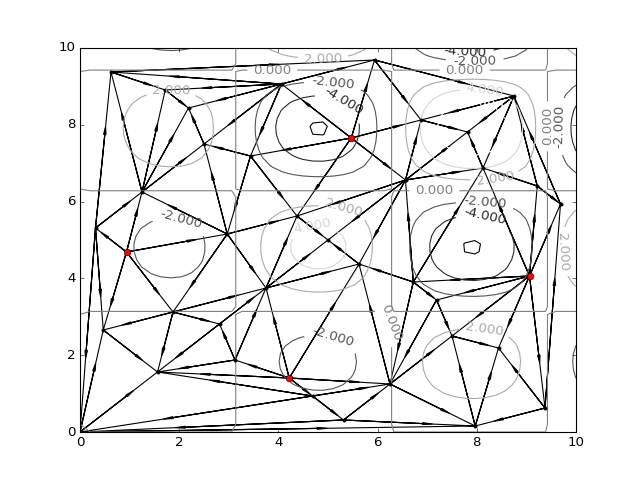

[[ 5.46875  7.65625]
 [ 4.21875  1.40625]
 [ 9.0625   4.0625 ]
 [ 0.9375   4.6875 ]]
Incidence Array:
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


/usr/lib/python3.5/site-packages/matplotlib/contour.py:370: RuntimeWarning: invalid value encountered in true_divide
  dist = np.add.reduce(([(abs(s)[i] / L[i]) for i in range(xsize)]), -1)


In [144]:
build_complex(n=40, lb1=0, lb2=0, ub1=10, ub2=10)

In [ ]:
SHc.Tri